In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df_train = pd.read_csv("../data/data_train.csv")  # Train dataset
df_test = pd.read_csv("../data/data_test.csv")    # Test dataset


In [32]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Id                    202944 non-null  int64
 1   HighBP                202944 non-null  int64
 2   HighChol              202944 non-null  int64
 3   CholCheck             202944 non-null  int64
 4   BMI                   202944 non-null  int64
 5   Smoker                202944 non-null  int64
 6   Stroke                202944 non-null  int64
 7   HeartDiseaseorAttack  202944 non-null  int64
 8   PhysActivity          202944 non-null  int64
 9   Fruits                202944 non-null  int64
 10  Veggies               202944 non-null  int64
 11  HvyAlcoholConsump     202944 non-null  int64
 12  AnyHealthcare         202944 non-null  int64
 13  NoDocbcCost           202944 non-null  int64
 14  GenHlth               202944 non-null  int64
 15  MentHlth              202944 non-n

In [33]:
print(f"SHAPE\n{df_train.shape}")
print(f"\nNULL VALUES COUNT\n{df_train.isna().sum()}")


SHAPE
(202944, 25)

NULL VALUES COUNT
Id                      0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
dtype: int64


In [34]:
print(f"Duplicated rows: {df_train.duplicated().sum()}")
print(f"Duplicated patients: {df_train.duplicated(subset='Id').sum()}")

Duplicated rows: 0
Duplicated patients: 0


In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Id                    202944 non-null  int64
 1   HighBP                202944 non-null  int64
 2   HighChol              202944 non-null  int64
 3   CholCheck             202944 non-null  int64
 4   BMI                   202944 non-null  int64
 5   Smoker                202944 non-null  int64
 6   Stroke                202944 non-null  int64
 7   HeartDiseaseorAttack  202944 non-null  int64
 8   PhysActivity          202944 non-null  int64
 9   Fruits                202944 non-null  int64
 10  Veggies               202944 non-null  int64
 11  HvyAlcoholConsump     202944 non-null  int64
 12  AnyHealthcare         202944 non-null  int64
 13  NoDocbcCost           202944 non-null  int64
 14  GenHlth               202944 non-null  int64
 15  MentHlth              202944 non-n

In [36]:
df_train.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,0,1,24,1,0,0,1,0,...,0,0,0,0,8,4,5,60,0,0
1,1,0,0,1,28,0,0,0,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,2,0,0,1,36,1,0,0,1,1,...,30,30,1,0,3,2,1,-46,0,0
3,3,0,1,1,35,0,0,0,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,4,0,1,1,27,0,0,0,1,0,...,0,0,0,0,9,5,4,-58,0,0


In [37]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50736 entries, 0 to 50735
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    50736 non-null  int64  
 1   HighBP                50736 non-null  int64  
 2   HighChol              50736 non-null  int64  
 3   CholCheck             50736 non-null  int64  
 4   BMI                   50736 non-null  int64  
 5   Smoker                50736 non-null  int64  
 6   Stroke                50736 non-null  int64  
 7   HeartDiseaseorAttack  50736 non-null  int64  
 8   PhysActivity          50736 non-null  int64  
 9   Fruits                50736 non-null  int64  
 10  Veggies               50736 non-null  int64  
 11  HvyAlcoholConsump     50736 non-null  int64  
 12  AnyHealthcare         50736 non-null  int64  
 13  NoDocbcCost           50736 non-null  int64  
 14  GenHlth               50736 non-null  int64  
 15  MentHlth           

In [38]:
print(f"SHAPE\n{df_test.shape}")
print(f"\nNULL VALUES COUNT\n{df_test.isna().sum()}")

SHAPE
(50736, 25)

NULL VALUES COUNT
Id                          0
HighBP                      0
HighChol                    0
CholCheck                   0
BMI                         0
Smoker                      0
Stroke                      0
HeartDiseaseorAttack        0
PhysActivity                0
Fruits                      0
Veggies                     0
HvyAlcoholConsump           0
AnyHealthcare               0
NoDocbcCost                 0
GenHlth                     0
MentHlth                    0
PhysHlth                    0
DiffWalk                    0
Sex                         0
Age                         0
Education                   0
Income                      0
ExtraMedTest                0
ExtraAlcoholTest            0
Status                  50736
dtype: int64


In [39]:
print(f"Duplicated rows: {df_test.duplicated().sum()}")

Duplicated rows: 0


In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50736 entries, 0 to 50735
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    50736 non-null  int64  
 1   HighBP                50736 non-null  int64  
 2   HighChol              50736 non-null  int64  
 3   CholCheck             50736 non-null  int64  
 4   BMI                   50736 non-null  int64  
 5   Smoker                50736 non-null  int64  
 6   Stroke                50736 non-null  int64  
 7   HeartDiseaseorAttack  50736 non-null  int64  
 8   PhysActivity          50736 non-null  int64  
 9   Fruits                50736 non-null  int64  
 10  Veggies               50736 non-null  int64  
 11  HvyAlcoholConsump     50736 non-null  int64  
 12  AnyHealthcare         50736 non-null  int64  
 13  NoDocbcCost           50736 non-null  int64  
 14  GenHlth               50736 non-null  int64  
 15  MentHlth           

In [41]:
df_test.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,202944,1,1,1,30,1,0,1,1,1,...,3,0,0,1,11,4,7,0,-145,NaN
1,202945,0,0,1,27,1,0,0,0,0,...,0,30,1,1,13,2,5,28,-145,NaN
2,202946,0,0,1,21,0,0,0,1,1,...,0,5,0,0,10,6,8,-26,72,NaN
3,202947,0,0,1,24,1,0,0,1,1,...,0,30,0,0,9,6,7,0,0,NaN
4,202948,1,0,1,34,0,0,0,1,1,...,0,1,1,0,11,4,7,-73,-63,NaN


I will be using 20 features to predict the target (Status) if the patient has diabetes or not (0 or 1)

| Feature | Data Type | Reason                                    |
|:--------|:----------|:------------------------------------------------|
| HighBP     | int       | High blood pressure (hypertension) is a common comorbidity with diabetes and can be a significant risk factor.|
| HighChol      | int       | High cholesterol levels are associated with diabetes risk. |
| BMI     | int       | Body Mass Index is a measure of body fat based on height and weight. Higher BMI is often associated with increased risk of diabetes (> 25). |
| Smoker      | int       | Smoking is a known risk factor for type 2 diabetes. |
| HeartDiseaseorAttack    | int     | Same with stroke.  |
| PhysActivity    | int     | Physical inactivity is a risk factor for developing type 2 diabetes. |
| Fruits     | int       | Consumption of fruits may have a protective effect against diabetes. |
| Veggies     | int       | Same with Fruits. |
| HvyAlcoholConsump     | int       | Heavy alcohol consumption is associated with increased risk of diabetes.. |
| GenHlth     | int       | General health perception may capture overall health status, which could be related to diabetes risk. |
| MentHlth     | int       | Mental health status could provide insights into overall well-being and potential diabetes risk. |
| PhysHlth     | int       | Same with MentHlth. |
| Sex     | int       | Same with MentHlth. |
| Age     | int       | Age is a significant risk factor for diabetes, with risk increasing with age. |
| Education    | int       | Socioeconomic factors can impact access to healthcare and lifestyle choices, which in turn may affect diabetes risk. |
| Income     | int       | Same with Income. |
| ExtraMedTest     | int       | It is not clear what the effect of these test but I will include it in the training process for now. |
| ExtraAlcoholTest     | int       | Same with MedTest. |


Reason for not choosing other features:

- Id: Based on requirements
- Cholcheck: Whether or not a patient has had a cholesterol check in the past 5 years doesn't provide any predictive power. 

In [42]:
df_train = df_train.drop(columns=['Id', 'CholCheck', 'Stroke', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk'])
df_test = df_test.drop(columns=['Id', 'CholCheck', 'Stroke', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Status'])

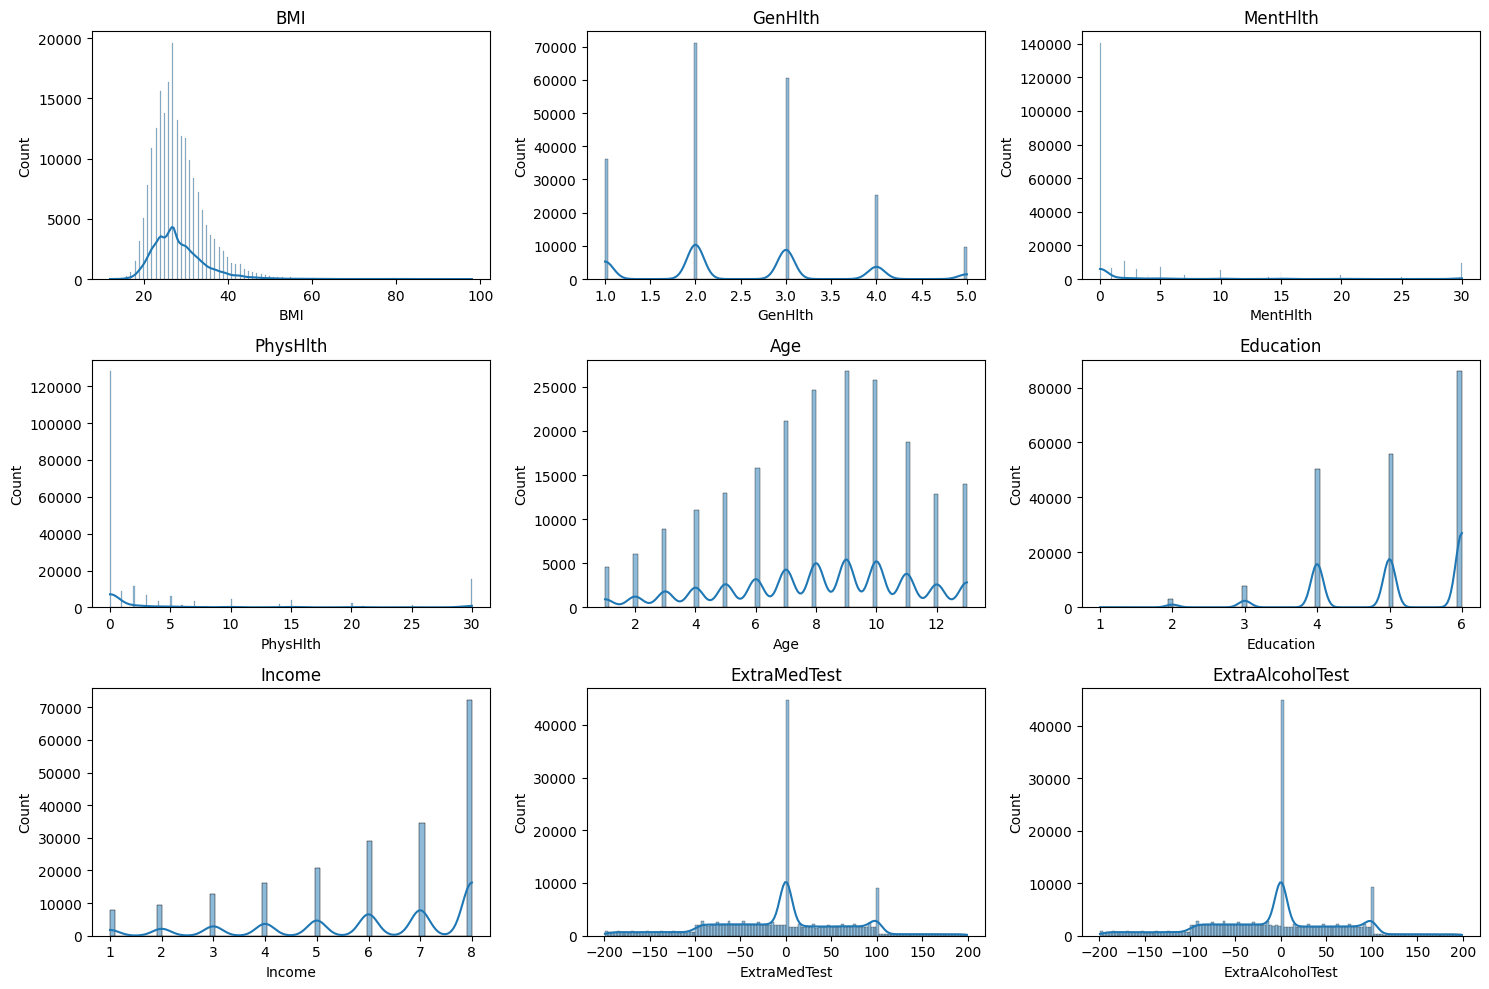

In [43]:
numerical_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income',
                      'ExtraMedTest', 'ExtraAlcoholTest']

# Plot histograms for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_train[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [44]:
print(f"'TRAIN DATA MIN'\n{df_train.min()}")


'TRAIN DATA MIN'
HighBP                    0
HighChol                  0
BMI                      12
Smoker                    0
Stroke                    0
HeartDiseaseorAttack      0
PhysActivity              0
Fruits                    0
Veggies                   0
HvyAlcoholConsump         0
GenHlth                   1
MentHlth                  0
PhysHlth                  0
DiffWalk                  0
Sex                       0
Age                       1
Education                 1
Income                    1
ExtraMedTest           -199
ExtraAlcoholTest       -199
Status                    0
dtype: int64


In [45]:
print(f"\n'TEST DATA MIN'\n{df_test.min()}")


'TEST DATA MIN'
HighBP                    0
HighChol                  0
BMI                      12
Smoker                    0
Stroke                    0
HeartDiseaseorAttack      0
PhysActivity              0
Fruits                    0
Veggies                   0
HvyAlcoholConsump         0
GenHlth                   1
MentHlth                  0
PhysHlth                  0
DiffWalk                  0
Sex                       0
Age                       1
Education                 1
Income                    1
ExtraMedTest           -199
ExtraAlcoholTest       -199
dtype: int64


In [46]:
print(df_test.isna().sum())


HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
dtype: int64


<!-- df_train.to_csv("../data/cleaned_train.csv", index=False)
df_test.to_csv("../data/cleaned_test.csv", index=False) -->

In [47]:
df_train.to_csv("../data/cleaned_train.csv", index=False)
df_test.to_csv("../data/cleaned_test.csv", index=False)